In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 講義第47頁

In [2]:
# Patterns
inputs = list()
inputs.append(np.array([1, 0.1, 0.1]))
inputs.append(np.array([1, 0.1, 0.95]))
inputs.append(np.array([1, 0.95, 0.1]))
inputs.append(np.array([1, 0.95, 0.95]))
inputs

[array([1. , 0.1, 0.1]),
 array([1.  , 0.1 , 0.95]),
 array([1.  , 0.95, 0.1 ]),
 array([1.  , 0.95, 0.95])]

In [3]:
# 隱藏層權重
Weight_InputToHiddenLayer = [[5.32, 3.13],
                [-3.73, -6.67],
                [-3.72, -6.61]]

In [4]:
# 內積
S_HiddenLayer = list()
for _input in inputs: 
  S_HiddenLayer.append(np.matmul(_input, Weight_InputToHiddenLayer))
S_HiddenLayer

[array([4.575, 1.802]),
 array([ 1.413 , -3.8165]),
 array([ 1.4045, -3.8675]),
 array([-1.7575, -9.486 ])]

In [5]:
print(1*5.32+0.1*(-3.73)+0.1*(-3.72))

4.575


In [6]:
print(1*3.13+0.1*(-6.67)+0.1*(-6.61))

1.802


In [7]:
# 為了利用Pandas Apply函數，特別轉換成Pandas
df_S_HiddenLayer = pd.DataFrame(S_HiddenLayer, columns=['H1', 'H2'])
df_S_HiddenLayer

,H1,H2
0,4.5750,1.8020
1,1.4130,-3.8165
2,1.4045,-3.8675
3,-1.7575,-9.4860


In [8]:
def sigmoid(v):
    return 1 / (1 + np.exp(-v))

In [9]:
df_S_HiddenLayer = df_S_HiddenLayer.apply(sigmoid)
df_S_HiddenLayer

,H1,H2
0,0.989799,0.858392
1,0.804239,0.021531
2,0.802897,0.020482
3,0.147104,0.000076


In [10]:
v = 4.5750	
1 / (1 + np.exp(-v))

0.9897988370592303

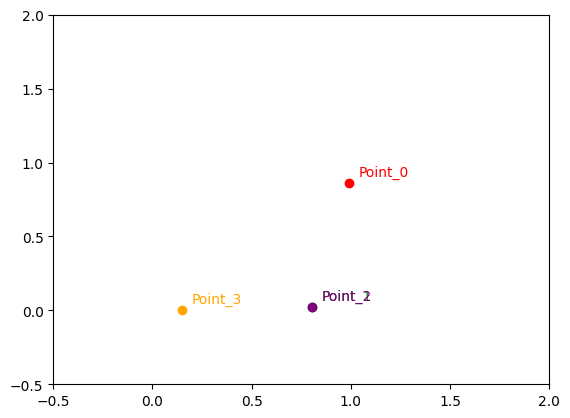

In [11]:
numpy_S_HiddenLayer = np.array(df_S_HiddenLayer)
numpy_S_HiddenLayer

# 選擇四種不同的顏色
colors =  ['red', 'green', 'purple', 'orange']

# 在每個點上標出數字
for i in range(len(numpy_S_HiddenLayer)):
    plt.plot(numpy_S_HiddenLayer[i][0], numpy_S_HiddenLayer[i][1], 'o', color=colors[i])
    plt.text(numpy_S_HiddenLayer[i][0]+0.05, numpy_S_HiddenLayer[i][1]+0.05, str(f'Point_{i}'), color=colors[i])

# 設定x軸和y軸的範圍
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)

# 顯示圖形
plt.show()

# 因為Point1及Point2數值很接近，所以會被蓋住。

In [12]:
# 插入X0 = 1
df_S_HiddenLayer.insert(0, 'H0', [1, 1, 1, 1])
df_S_HiddenLayer

,H0,H1,H2
0,1,0.989799,0.858392
1,1,0.804239,0.021531
2,1,0.802897,0.020482
3,1,0.147104,0.000076


In [13]:
# 轉成numpy
numpy_S_HiddenLayer = np.array(df_S_HiddenLayer)
numpy_S_HiddenLayer

array([[1.00000000e+00, 9.89798837e-01, 8.58392219e-01],
       [1.00000000e+00, 8.04238691e-01, 2.15309020e-02],
       [1.00000000e+00, 8.02897000e-01, 2.04822841e-02],
       [1.00000000e+00, 1.47103724e-01, 7.59013639e-05]])

In [14]:
# 輸出層權重
Weight_HiddenLayerToOutput = [[-3.08],
                [7.30],
                [-7.30]]
Weight_HiddenLayerToOutput

[[-3.08], [7.3], [-7.3]]

In [15]:
# 內積
S_Predict = list()
for _input in numpy_S_HiddenLayer:
  S_Predict.append(sigmoid(np.matmul(_input, Weight_HiddenLayerToOutput)))
S_Predict

[array([0.10709808]),
 array([0.93300339]),
 array([0.93286954]),
 array([0.11850158])]

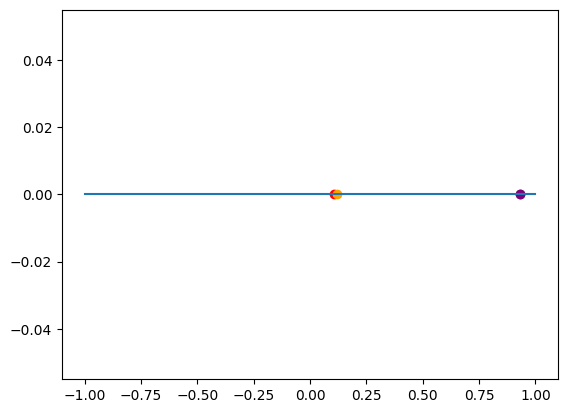

In [16]:
import matplotlib.pyplot as plt

# 繪製直線
x = [-1, 1]
y = [0, 0]
plt.plot(x, y)

# 繪製四個點
colors = ['red', 'green', 'purple', 'orange']
i = 0
for (point, color) in zip(S_Predict,colors) :
    plt.scatter(point, 0, color=color)
    i += 1

# 顯示圖形
plt.show()

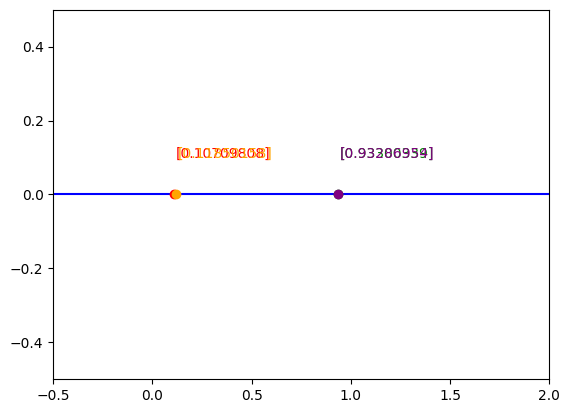

In [17]:
# 選擇四種不同的顏色
colors =  ['red', 'green', 'purple', 'orange']
# 繪製直線
plt.axhline(y=0, color='blue')

# 在每個點上標出數字
for i in range(len(S_Predict)):
    plt.plot(S_Predict[i], 0, 'o', color=colors[i])
    plt.text(S_Predict[i]+0.01, 0.1, str(S_Predict[i]), color=colors[i])

# 設定x軸和y軸的範圍
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 0.5)

# 顯示圖形
plt.show()

## 講義第48頁

In [18]:
# Patterns
inputs = list()
inputs.append(np.array([1, 0.1, 0.1]))
inputs.append(np.array([1, 0.1, 0.95]))
inputs.append(np.array([1, 0.95, 0.1]))
inputs.append(np.array([1, 0.95, 0.95]))
inputs

[array([1. , 0.1, 0.1]),
 array([1.  , 0.1 , 0.95]),
 array([1.  , 0.95, 0.1 ]),
 array([1.  , 0.95, 0.95])]

In [19]:
# 隱藏層權重
Weight_InputToHiddenLayer = [[2.73, 3.51],
                [-6.37, 7.89],
                [6.60, -7.92]]

In [20]:
# 內積
S_HiddenLayer = list()
for _input in inputs: 
  S_HiddenLayer.append(np.matmul(_input, Weight_InputToHiddenLayer))
S_HiddenLayer

[array([2.753, 3.507]),
 array([ 8.363, -3.225]),
 array([-2.6615, 10.2135]),
 array([2.9485, 3.4815])]

In [21]:
print(1*2.73+0.1*(-6.37)+0.1*(6.60))

2.753


In [22]:
print(1*3.51+0.1*(7.89)+0.1*(-7.92))

3.5069999999999997


In [23]:
# 為了利用Pandas Apply函數，特別轉換成Pandas
df_S_HiddenLayer = pd.DataFrame(S_HiddenLayer, columns=['H1', 'H2'])
df_S_HiddenLayer
     

,H1,H2
0,2.7530,3.5070
1,8.3630,-3.2250
2,-2.6615,10.2135
3,2.9485,3.4815


In [24]:
def sigmoid(v):
    return 1 / (1 + np.exp(-v))

In [25]:
df_S_HiddenLayer = df_S_HiddenLayer.apply(sigmoid)
df_S_HiddenLayer

,H1,H2
0,0.940083,0.970886
1,0.999767,0.038236
2,0.065284,0.999963
3,0.950193,0.970157


In [26]:
v = 2.7530	
1 / (1 + np.exp(-v))

0.9400825551260119

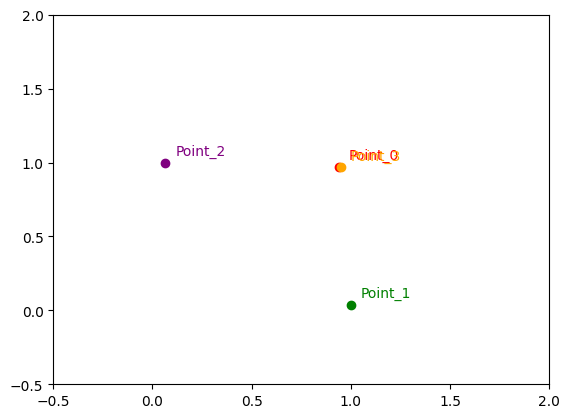

In [27]:
numpy_S_HiddenLayer = np.array(df_S_HiddenLayer)
numpy_S_HiddenLayer

# 選擇四種不同的顏色
colors =  ['red', 'green', 'purple', 'orange']

# 在每個點上標出數字
for i in range(len(numpy_S_HiddenLayer)):
    plt.plot(numpy_S_HiddenLayer[i][0], numpy_S_HiddenLayer[i][1], 'o', color=colors[i])
    plt.text(numpy_S_HiddenLayer[i][0]+0.05, numpy_S_HiddenLayer[i][1]+0.05, str(f'Point_{i}'), color=colors[i])

# 設定x軸和y軸的範圍
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)

# 顯示圖形
plt.show()

# 因為Point0及Point3數值很接近，所以會被蓋住。

In [28]:
# 插入X0 = 1
df_S_HiddenLayer.insert(0, 'H0', [1, 1, 1, 1])
df_S_HiddenLayer

,H0,H1,H2
0,1,0.940083,0.970886
1,1,0.999767,0.038236
2,1,0.065284,0.999963
3,1,0.950193,0.970157


In [29]:
# 轉成numpy
numpy_S_HiddenLayer = np.array(df_S_HiddenLayer)
numpy_S_HiddenLayer

array([[1.        , 0.94008256, 0.97088629],
       [1.        , 0.99976671, 0.03823569],
       [1.        , 0.06528374, 0.99996333],
       [1.        , 0.95019255, 0.97015678]])

In [30]:
# 輸出層權重
Weight_HiddenLayerToOutput = [[-8.03, 8.44],
                [5.71, -5.59],
                [5.55, -5.44]]
Weight_HiddenLayerToOutput

[[-8.03, 8.44], [5.71, -5.59], [5.55, -5.44]]

In [31]:
# 內積
S_Predict = list()
for _input in numpy_S_HiddenLayer:
  S_Predict.append(sigmoid(np.matmul(_input, Weight_HiddenLayerToOutput)))
S_Predict

[array([0.93856026, 0.10941965]),
 array([0.10821318, 0.93359696]),
 array([0.10837643, 0.93309688]),
 array([0.94158377, 0.10440327])]

In [32]:
pd.DataFrame(S_Predict, columns=['H1', 'H2'])

,H1,H2
0,0.938560,0.109420
1,0.108213,0.933597
2,0.108376,0.933097
3,0.941584,0.104403


In [33]:
print(sigmoid(1*(-8.03)+0.94008256*(5.71)+0.970886291*(5.55)))

0.938560267317702


In [34]:
print(sigmoid(1*(8.44)+0.94008256*(-5.59)+0.970886291*(-5.44)))

0.1094196407893468


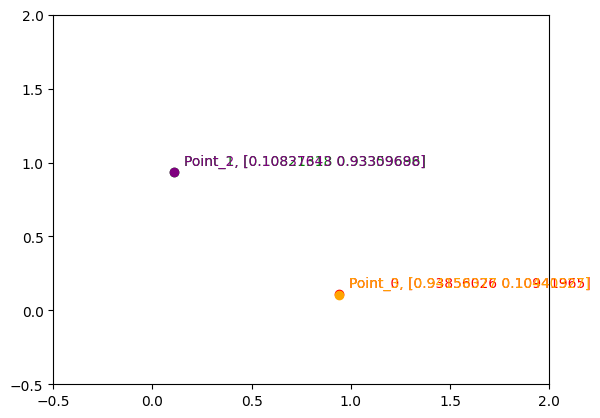

In [35]:
# 選擇四種不同的顏色
colors =  ['red', 'green', 'purple', 'orange']

# 在每個點上標出數字
for i in range(len(S_Predict)):
    plt.plot(S_Predict[i][0], S_Predict[i][1], 'o', color=colors[i])
    plt.text(S_Predict[i][0]+0.05, S_Predict[i][1]+0.05, str(f'Point_{i}, {S_Predict[i]}'), color=colors[i])

# 設定x軸和y軸的範圍
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)

# 顯示圖形
plt.show()

# 因為Point1及Point2數值很接近，所以會被蓋住。